In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.arange(40).reshape(-1, 4)
a = np.c_[np.arange(10), a]

In [3]:
a

array([[ 0,  0,  1,  2,  3],
       [ 1,  4,  5,  6,  7],
       [ 2,  8,  9, 10, 11],
       [ 3, 12, 13, 14, 15],
       [ 4, 16, 17, 18, 19],
       [ 5, 20, 21, 22, 23],
       [ 6, 24, 25, 26, 27],
       [ 7, 28, 29, 30, 31],
       [ 8, 32, 33, 34, 35],
       [ 9, 36, 37, 38, 39]])

In [4]:
def root_mean_sq(a):
    return (sum(a**2)/a.size)**(0.5)

In [5]:
def rms_smooth(a, N, stp):
    """
    Perform root-mean-squares smoothing on the data set
    This creates data_set_smooth attribute
    N - number of samples in time window
    stp - step size
    """
    nr, nc = a.shape
    n_slides = (a[:, 1].size - (N - stp)) / stp # num windows
    ### initialize sliding window variables ###
    res_sz = int(n_slides) # truncate num of slides for result size
    res = np.zeros(shape=(res_sz, nc))
    s = 0 # window start
    e = N # window end
    for n, v in enumerate(res):
        v[0] = a[e, 0]
        v[1:] = np.apply_along_axis(root_mean_sq, 0, a[s:e, 1:])
        s += stp
        e += stp
    return res

In [6]:
rms_smooth(a, 3, 2)

array([[ 3.        ,  5.16397779,  5.97215762,  6.83130051,  7.72442015],
       [ 5.        , 12.4365054 , 13.40397951, 14.37590577, 15.35143859],
       [ 7.        , 20.2649122 , 21.25245084, 22.24110309, 23.23072678],
       [ 9.        , 28.18983268, 29.18332857, 30.17725413, 31.17156824]])

---

In [7]:
from data_cube import DataCube

In [21]:
dc = DataCube(
    subjects="all",
    gestures=["1", "2", "3", "4"],
    data_grp="subsample"
)
dc.load_data()

In [22]:
dc.rms_smooth(20, 5)

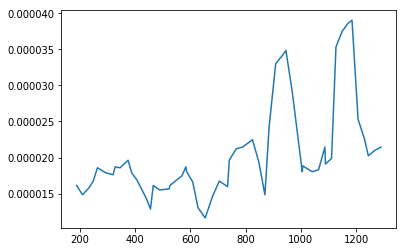

In [24]:
plt.plot(dc.data_set_smooth["20"]["1_0_2"][:, 0],
         dc.data_set_smooth["20"]["1_0_2"][:, 3])
plt.show()